In [1]:
import pandas as pd

# Load your dataset (update 'hourly_time_series.csv' to your actual file path if different)
# Assuming the dataset is stored in a CSV file
df = pd.read_csv('/content/hourly_time_series.csv')

# Create the new column 'Ren' as the sum of 'Wind', 'Solar', and 'Biomass'
df['Ren'] = df['Wind'] + df['Solar'] + df['Biomass']

# Display the first few rows to confirm the new column
print(df.head())


     Biomass         Coal          Gas        Gas-CC       Hydro      Nuclear  \
0  24.422852  7139.291004  1821.296630  11909.157473  116.123442  3764.512096   
1  24.323064  5980.969104  1816.123637  11124.542169  115.884781  3763.160005   
2  24.337510  5500.761559  1848.845507  10148.407981  115.638169  3763.942741   
3  24.337624  5328.113821  1925.732386   9227.963990  115.427869  3764.716900   
4  24.289358  5273.254236  2003.997198   8744.819567  115.445464  3764.507067   

       Other  Solar         Wind                 date          Ren  
0  21.123523    0.0  5615.725887  2012-01-01 01:00:00  5640.148739  
1  21.672131    0.0  5748.293737  2012-01-01 02:00:00  5772.616801  
2  21.571136    0.0  5866.029143  2012-01-01 03:00:00  5890.366653  
3  21.672393    0.0  5989.072335  2012-01-01 04:00:00  6013.409959  
4  21.585433    0.0  5996.661818  2012-01-01 05:00:00  6020.951176  


In [3]:
# Converting date to a date time object

df = df.copy()  # Create an independent copy
df['date'] = pd.to_datetime(df['date'])


In [4]:
df.columns

Index(['Biomass', 'Coal', 'Gas', 'Gas-CC', 'Hydro', 'Nuclear', 'Other',
       'Solar', 'Wind', 'date', 'Ren'],
      dtype='object')

In [5]:
print(len(df))

105192


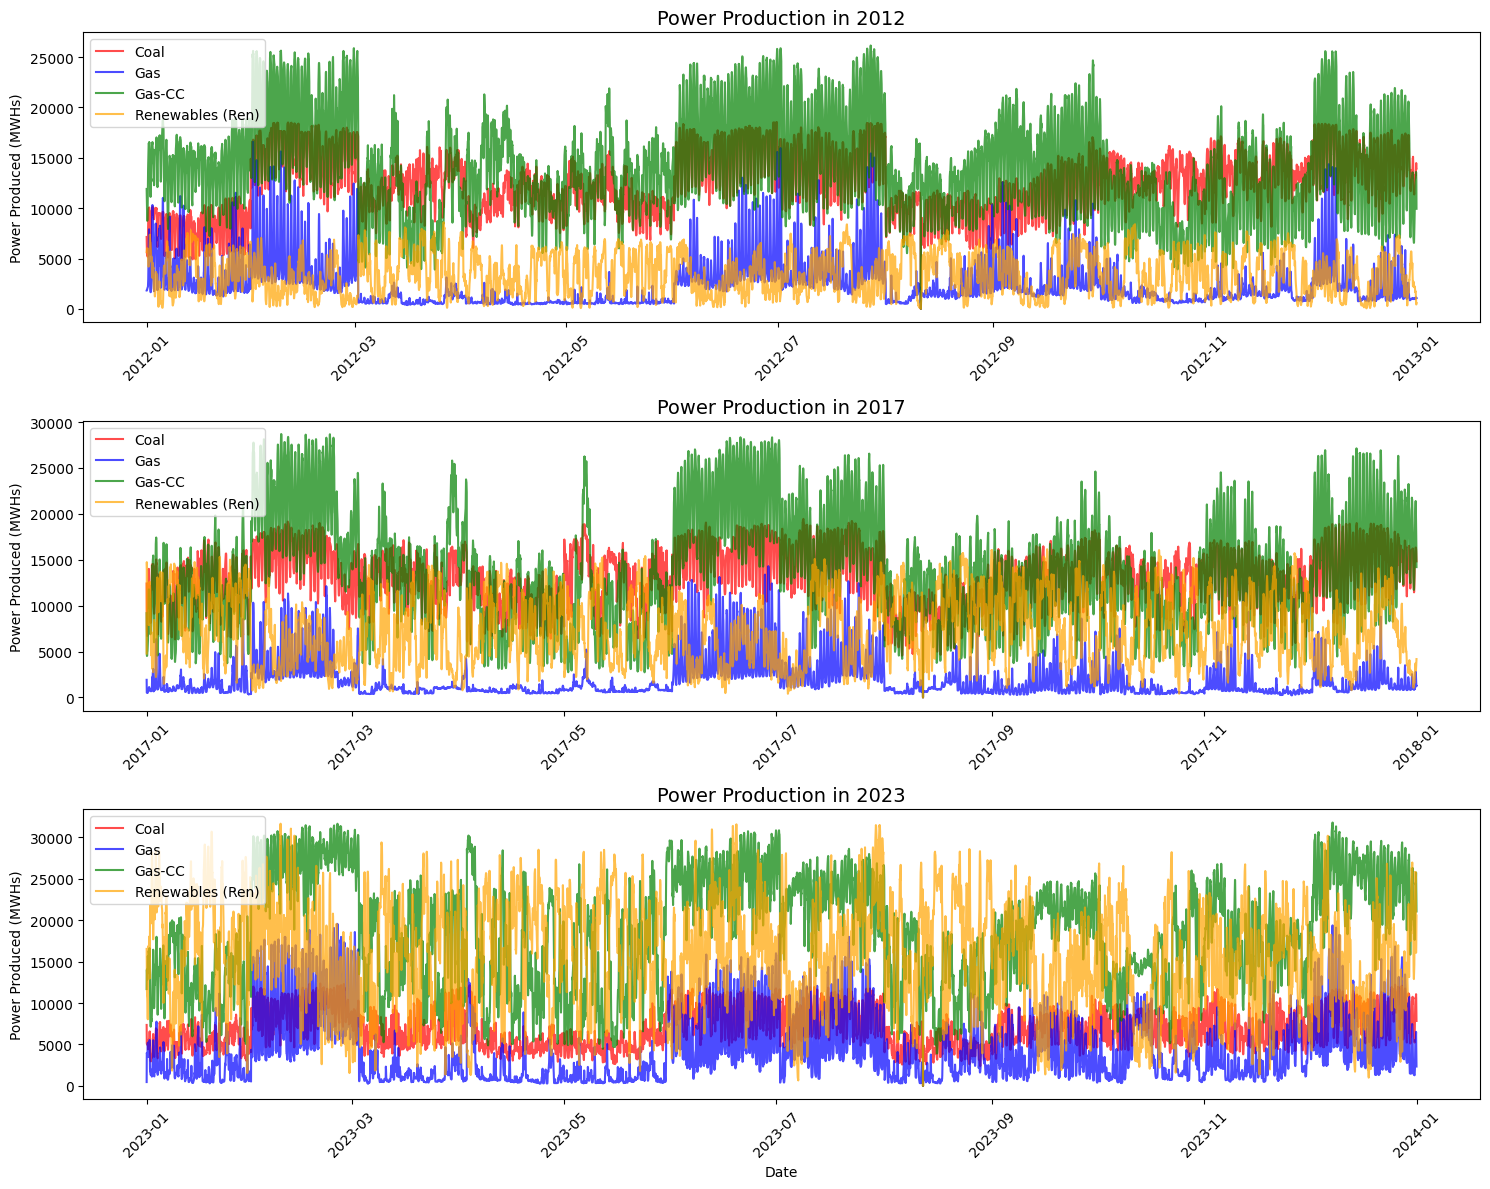

In [9]:
import matplotlib.pyplot as plt

# Define the years to plot
years = [2012, 2017, 2023]

# Define a color scheme for the variables
colors = {
    'Coal': 'red',
    'Gas': 'blue',
    'Gas-CC': 'green',
    'Ren': 'orange'
}

# Create a figure with subplots arranged vertically
fig, axes = plt.subplots(len(years), 1, figsize=(15, 12), sharex=False)

# Loop through each year and plot the data
for i, year in enumerate(years):
    # Filter data for the current year
    df_year = df[df['date'].dt.year == year]

    # Plot the data for the current year
    axes[i].plot(df_year['date'], df_year['Coal'], label='Coal', color=colors['Coal'], alpha=0.7)
    axes[i].plot(df_year['date'], df_year['Gas'], label='Gas', color=colors['Gas'], alpha=0.7)
    axes[i].plot(df_year['date'], df_year['Gas-CC'], label='Gas-CC', color=colors['Gas-CC'], alpha=0.7)
    axes[i].plot(df_year['date'], df_year['Ren'], label='Renewables (Ren)', color=colors['Ren'], alpha=0.7)

    # Set the title and legend
    axes[i].set_title(f'Power Production in {year}', fontsize=14)
    axes[i].legend(loc='upper left')
    axes[i].set_ylabel('Power Produced (MWHs)')
    axes[i].tick_params(axis='x', rotation=45)

# Add a common x-axis label for the last subplot
axes[-1].set_xlabel('Date')

# Adjust layout for better visualization
plt.tight_layout()

# Save the figure as a file if needed
plt.savefig('enhanced_power_production_plots.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


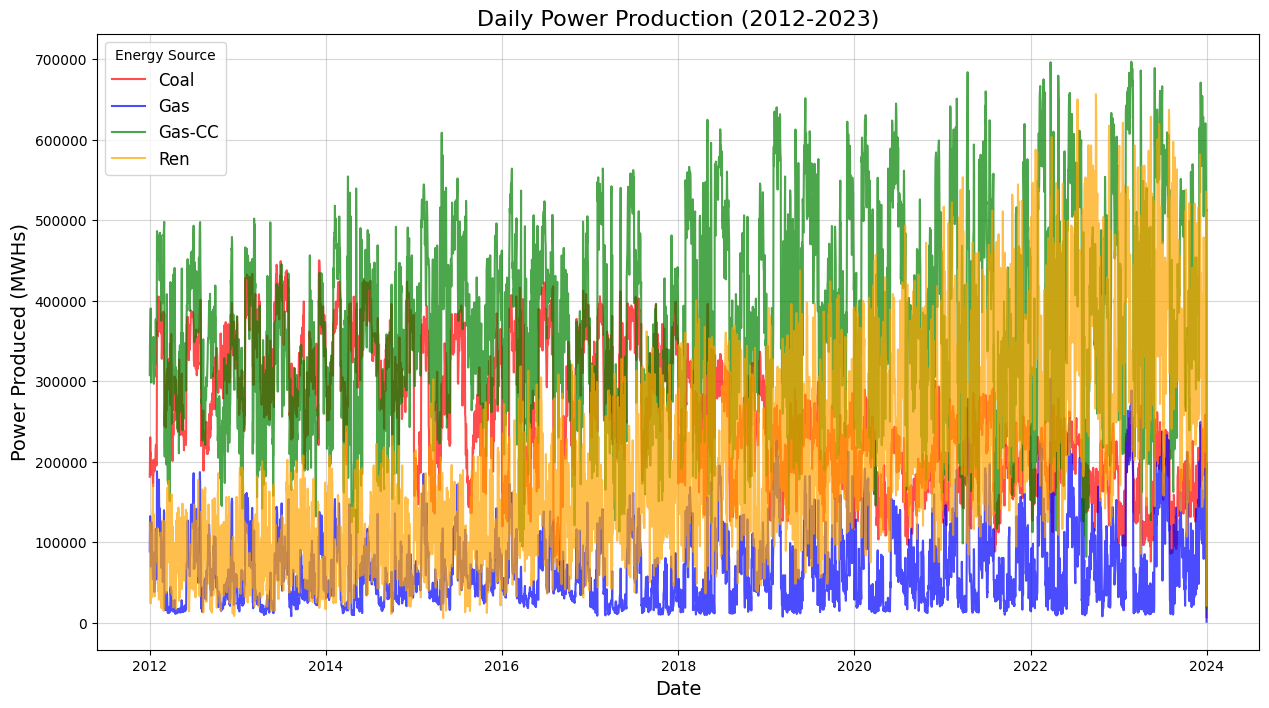

In [13]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new column for the date only (removing time) for grouping
df['date_only'] = df['date'].dt.date

# Group by 'date_only' and sum only numeric columns
df_daily = df.groupby('date_only').agg({col: 'sum' for col in df.columns if col not in ['date', 'date_only']}).reset_index()

# Rename 'date_only' back to 'date' for consistency
df_daily.rename(columns={'date_only': 'date'}, inplace=True)

# Convert 'date' column back to datetime format for plotting
df_daily['date'] = pd.to_datetime(df_daily['date'])

# Define the columns to plot and their corresponding colors
columns_to_plot = ['Coal', 'Gas', 'Gas-CC', 'Ren']
colors = {
    'Coal': 'red',
    'Gas': 'blue',
    'Gas-CC': 'green',
    'Ren': 'orange'
}

# Plot the daily data for Coal, Gas, Gas-CC, and Ren from 2012 to 2023
plt.figure(figsize=(15, 8))

# Loop through the columns to plot each on the same graph with custom colors
for col in columns_to_plot:
    plt.plot(df_daily['date'], df_daily[col], label=col, color=colors[col], alpha=0.7)

# Add titles and labels
plt.title('Daily Power Production (2012-2023)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Power Produced (MWHs)', fontsize=14)
plt.legend(title='Energy Source', fontsize=12)
plt.grid(alpha=0.5)

# Save the plot as a file if needed
plt.savefig('enhanced_daily_power_production_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


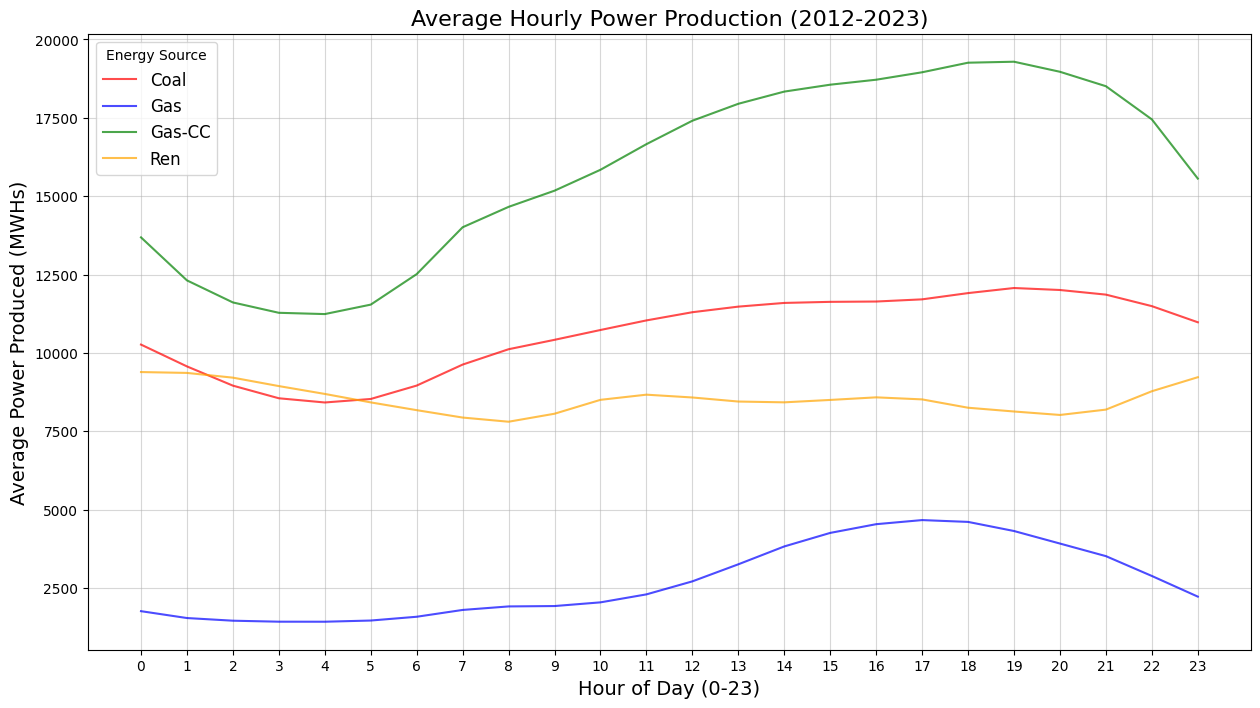

In [15]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the hour from the 'date' column
df['hour'] = df['date'].dt.hour

# Group by the hour and calculate the average for numeric columns only
numeric_columns = ['Coal', 'Gas', 'Gas-CC', 'Ren']
avg_hourly = df.groupby('hour')[numeric_columns].mean().reset_index()

# Define the columns to plot and their corresponding colors
colors = {
    'Coal': 'red',
    'Gas': 'blue',
    'Gas-CC': 'green',
    'Ren': 'orange'
}

# Plot the average hourly production
plt.figure(figsize=(15, 8))

# Loop through the columns to plot each on the same graph with custom colors
for col in numeric_columns:
    plt.plot(avg_hourly['hour'], avg_hourly[col], label=col, color=colors[col], alpha=0.7)

# Add titles and labels
plt.title('Average Hourly Power Production (2012-2023)', fontsize=16)
plt.xlabel('Hour of Day (0-23)', fontsize=14)
plt.ylabel('Average Power Produced (MWHs)', fontsize=14)
plt.xticks(range(24))  # Show all hours on the x-axis
plt.legend(title='Energy Source', fontsize=12)
plt.grid(alpha=0.5)

# Save the plot as a file if needed
plt.savefig('average_hourly_power_production_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


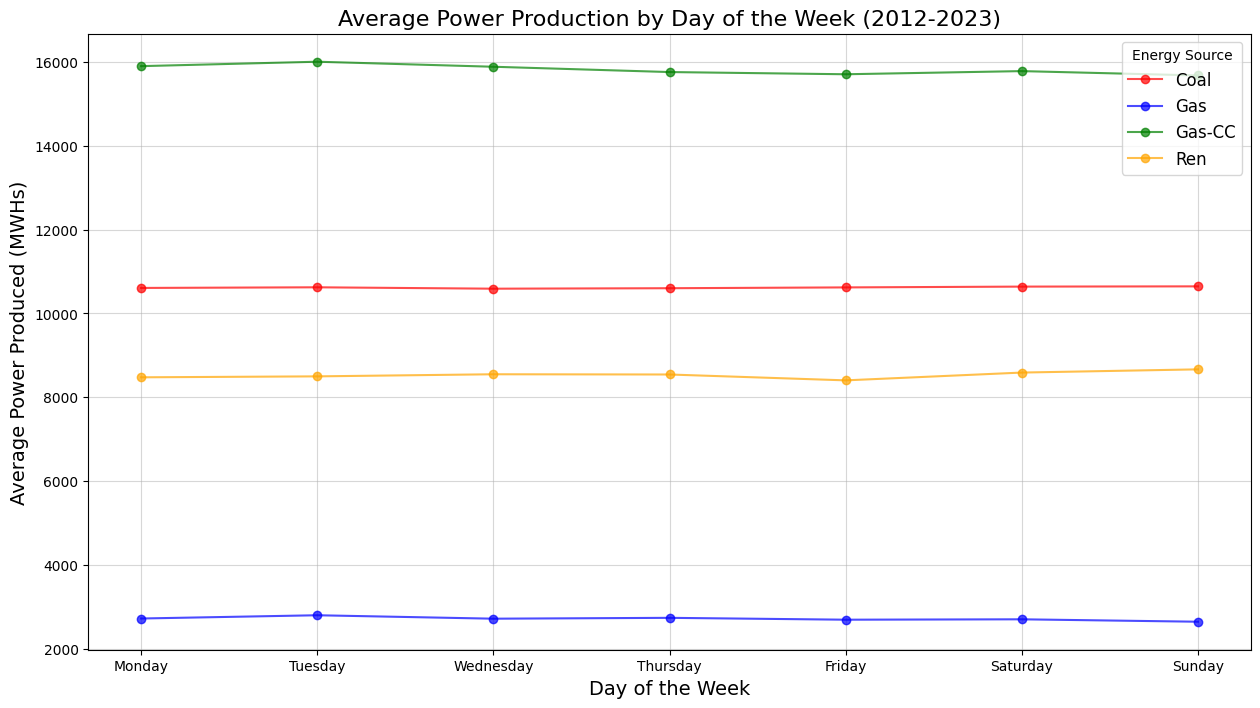

In [16]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the day of the week from the 'date' column (0=Monday, 6=Sunday)
df['day_of_week'] = df['date'].dt.dayofweek

# Define a mapping of day numbers to day names for better readability
days_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Group by day_of_week and calculate the average for numeric columns only
numeric_columns = ['Coal', 'Gas', 'Gas-CC', 'Ren']
avg_daily = df.groupby('day_of_week')[numeric_columns].mean().reset_index()

# Replace day numbers with day names
avg_daily['day_of_week'] = avg_daily['day_of_week'].map(days_mapping)

# Define the columns to plot and their corresponding colors
colors = {
    'Coal': 'red',
    'Gas': 'blue',
    'Gas-CC': 'green',
    'Ren': 'orange'
}

# Plot the average production by day of the week
plt.figure(figsize=(15, 8))

# Loop through the columns to plot each on the same graph with custom colors
for col in numeric_columns:
    plt.plot(avg_daily['day_of_week'], avg_daily[col], label=col, color=colors[col], alpha=0.7, marker='o')

# Add titles and labels
plt.title('Average Power Production by Day of the Week (2012-2023)', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Average Power Produced (MWHs)', fontsize=14)
plt.legend(title='Energy Source', fontsize=12)
plt.grid(alpha=0.5)

# Save the plot as a file if needed
plt.savefig('average_daily_power_production_by_weekday.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


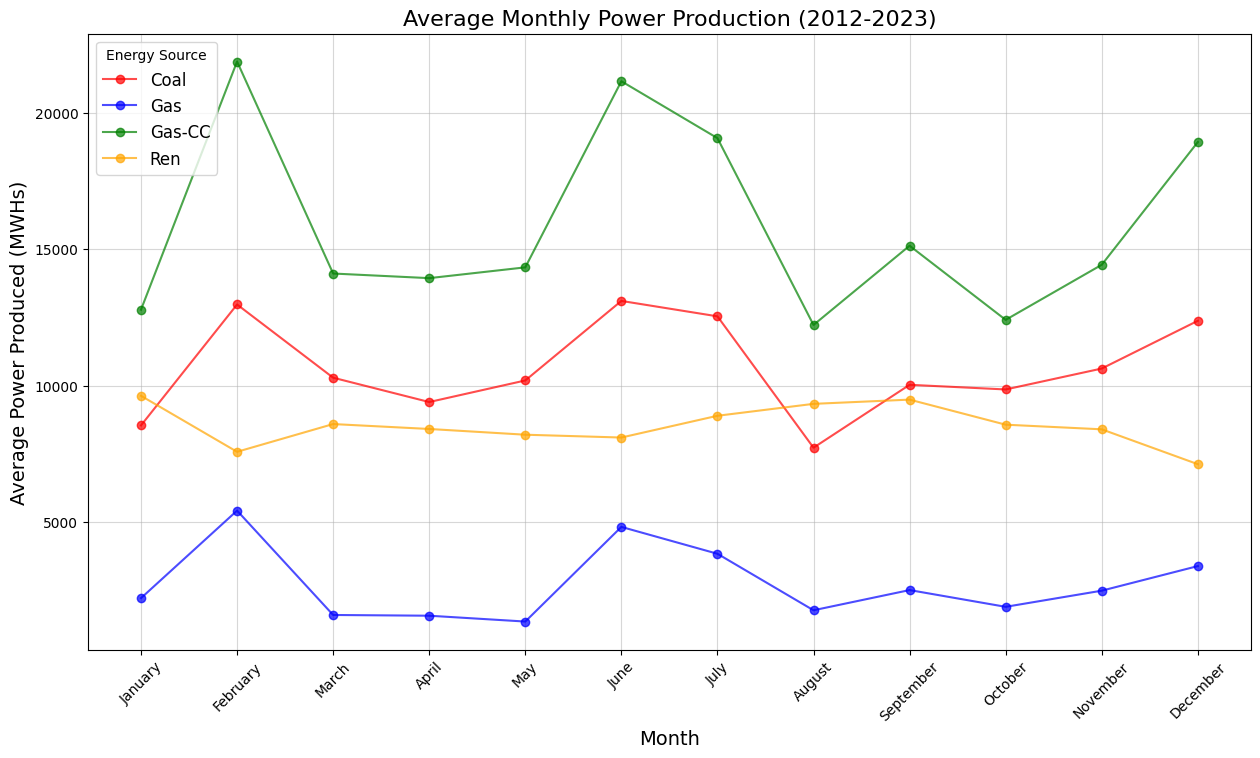

In [17]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the 'date' column
df['month'] = df['date'].dt.month

# Define a mapping of month numbers to month names for better readability
months_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Group by month and calculate the average for numeric columns only
numeric_columns = ['Coal', 'Gas', 'Gas-CC', 'Ren']
avg_monthly = df.groupby('month')[numeric_columns].mean().reset_index()

# Replace month numbers with month names
avg_monthly['month'] = avg_monthly['month'].map(months_mapping)

# Define the columns to plot and their corresponding colors
colors = {
    'Coal': 'red',
    'Gas': 'blue',
    'Gas-CC': 'green',
    'Ren': 'orange'
}

# Plot the average monthly production
plt.figure(figsize=(15, 8))

# Loop through the columns to plot each on the same graph with custom colors
for col in numeric_columns:
    plt.plot(avg_monthly['month'], avg_monthly[col], label=col, color=colors[col], alpha=0.7, marker='o')

# Add titles and labels
plt.title('Average Monthly Power Production (2012-2023)', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Power Produced (MWHs)', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Energy Source', fontsize=12)
plt.grid(alpha=0.5)

# Save the plot as a file if needed
plt.savefig('average_monthly_power_production_plot.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


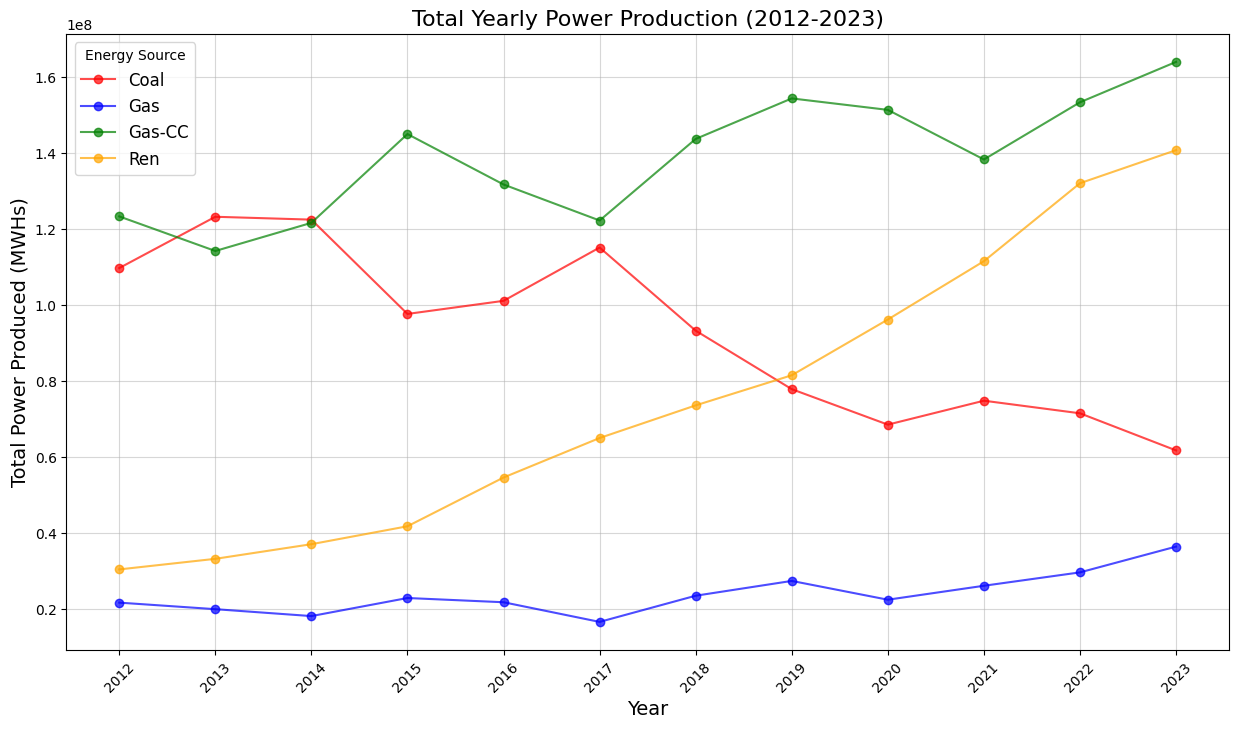

In [20]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by year and calculate the total production for numeric columns only
numeric_columns = ['Coal', 'Gas', 'Gas-CC', 'Ren']
total_yearly = df.groupby('year')[numeric_columns].sum().reset_index()

# Filter out 2024 if it exists
total_yearly = total_yearly[total_yearly['year'] != 2024]

# Define the columns to plot and their corresponding colors
colors = {
    'Coal': 'red',
    'Gas': 'blue',
    'Gas-CC': 'green',
    'Ren': 'orange'
}

# Plot the total yearly production
plt.figure(figsize=(15, 8))

# Loop through the columns to plot each on the same graph with custom colors
for col in numeric_columns:
    plt.plot(total_yearly['year'], total_yearly[col], label=col, color=colors[col], alpha=0.7, marker='o')

# Add titles and labels
plt.title('Total Yearly Power Production (2012-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Power Produced (MWHs)', fontsize=14)
plt.xticks(total_yearly['year'], rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Energy Source', fontsize=12)
plt.grid(alpha=0.5)

# Save the plot as a file if needed
plt.savefig('total_yearly_power_production_plot_no_2024.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


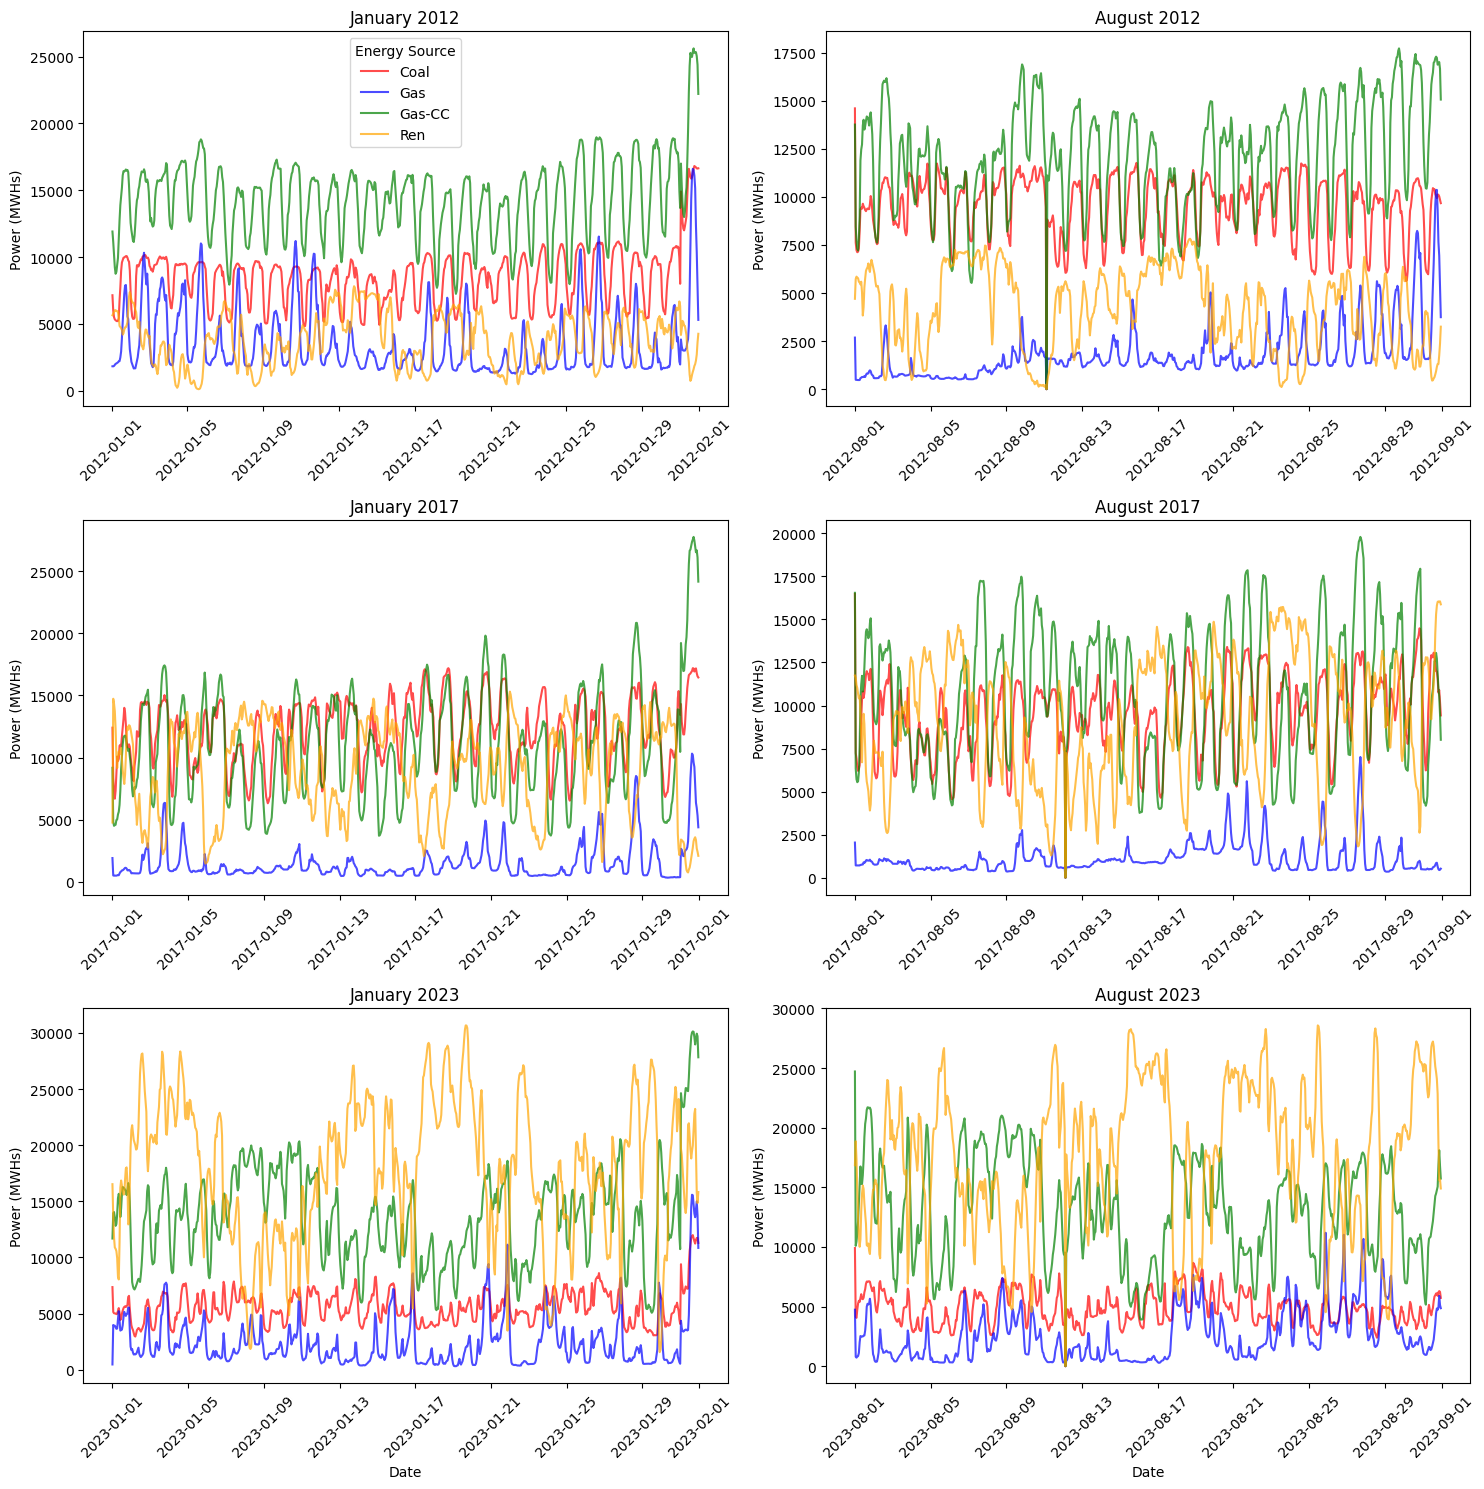

In [21]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define the years and months for the plots
years = [2012, 2017, 2023]
months = {'January': 1, 'August': 8}
numeric_columns = ['Coal', 'Gas', 'Gas-CC', 'Ren']

# Define the colors for each energy source
colors = {
    'Coal': 'red',
    'Gas': 'blue',
    'Gas-CC': 'green',
    'Ren': 'orange'
}

# Create a figure with 3 rows and 2 columns of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=False, sharey=False)

# Loop through each year and month to populate the subplots
for row, year in enumerate(years):
    for col, (month_name, month_number) in enumerate(months.items()):
        # Filter data for the current year and month
        df_filtered = df[(df['date'].dt.year == year) & (df['date'].dt.month == month_number)]

        # Plot the data for the selected month and year
        ax = axes[row, col]
        for source in numeric_columns:
            ax.plot(df_filtered['date'], df_filtered[source], label=source, color=colors[source], alpha=0.7)

        # Add title and labels
        ax.set_title(f'{month_name} {year}', fontsize=12)
        ax.set_ylabel('Power (MWHs)', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

        # Add legend for the top-left plot only for clarity
        if row == 0 and col == 0:
            ax.legend(title='Energy Source', fontsize=10)

# Add an x-axis label to the bottom row subplots
for ax in axes[2, :]:
    ax.set_xlabel('Date', fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure if needed
plt.savefig('hourly_production_pattern_figure.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


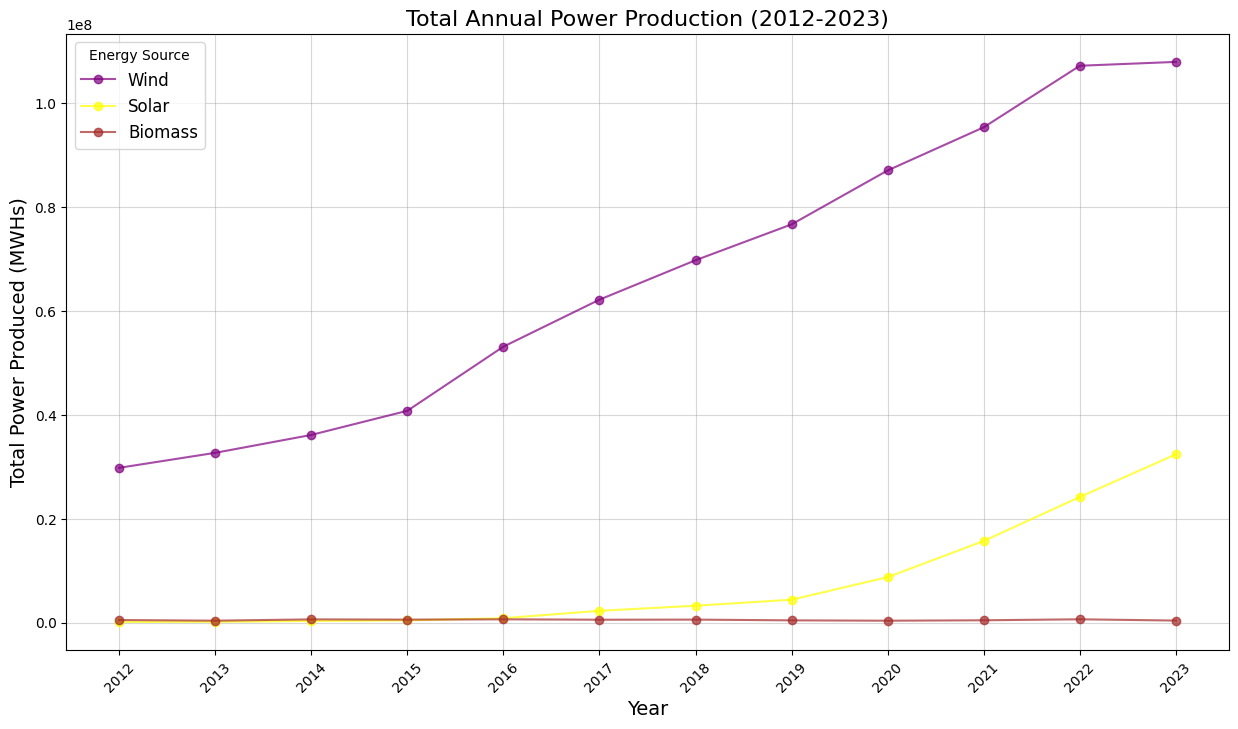

In [23]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by year and calculate the total production for the selected columns
columns_to_plot = ['Wind', 'Solar', 'Biomass']
total_annual = df.groupby('year')[columns_to_plot].sum().reset_index()

# Filter out 2024 if it exists
total_annual = total_annual[total_annual['year'] != 2024]

# Define the colors for each energy source
colors = {
    'Wind': 'purple',
    'Solar': 'yellow',
    'Biomass': 'brown'
}

# Plot the total annual production
plt.figure(figsize=(15, 8))

# Loop through the columns to plot each on the same graph with custom colors
for col in columns_to_plot:
    plt.plot(total_annual['year'], total_annual[col], label=col, color=colors[col], alpha=0.7, marker='o')

# Add titles and labels
plt.title('Total Annual Power Production (2012-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Power Produced (MWHs)', fontsize=14)
plt.xticks(total_annual['year'], rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Energy Source', fontsize=12)
plt.grid(alpha=0.5)

# Save the plot as a file if needed
plt.savefig('total_annual_power_production_wind_solar_biomass_no_2024.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


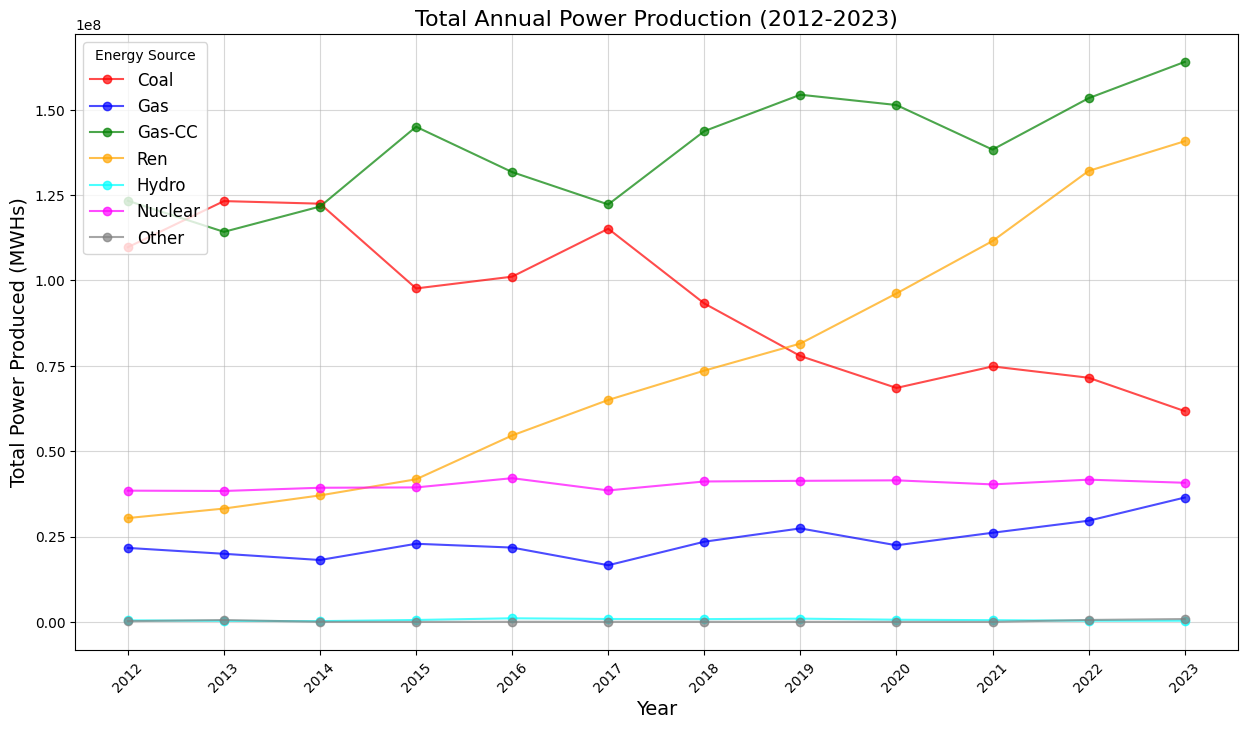

In [25]:
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by year and calculate the total production for the selected columns
columns_to_plot = ['Coal', 'Gas', 'Gas-CC', 'Ren', 'Hydro', 'Nuclear', 'Other']
total_annual = df.groupby('year')[columns_to_plot].sum().reset_index()

# Filter out 2024 if it exists
total_annual = total_annual[total_annual['year'] != 2024]

# Define the colors for each energy source
colors = {
    'Coal': 'red',
    'Gas': 'blue',
    'Gas-CC': 'green',
    'Ren': 'orange',
    'Hydro': 'cyan',
    'Nuclear': 'magenta',
    'Other': 'grey'
}

# Plot the total annual production
plt.figure(figsize=(15, 8))

# Loop through the columns to plot each on the same graph with custom colors
for col in columns_to_plot:
    plt.plot(total_annual['year'], total_annual[col], label=col, color=colors[col], alpha=0.7, marker='o')

# Add titles and labels
plt.title('Total Annual Power Production (2012-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Power Produced (MWHs)', fontsize=14)
plt.xticks(total_annual['year'], rotation=45)  # Rotate x-axis labels for better readability

# Change the legend position to the top-left corner
plt.legend(title='Energy Source', fontsize=12, loc='upper left')

plt.grid(alpha=0.5)

# Save the plot as a file if needed
plt.savefig('total_annual_power_production_all_sources_no_2024_top_left_legend.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()
